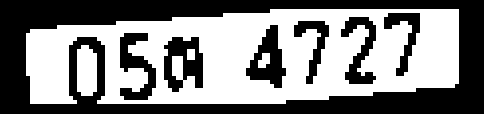

In [59]:
import pytesseract
from PIL import Image, ImageOps, ImageEnhance, ImageFilter
from matplotlib import pyplot as plt

# 이미지 불러오기
image_path = r"C:\Parking control system\extracted_plate.jpg"
image = Image.open(image_path)

# 그레이스케일 변환
image = ImageOps.grayscale(image)

# 대비 증가
enhancer = ImageEnhance.Contrast(image)
image = enhancer.enhance(2.0)

# 선명도 증가
enhancer = ImageEnhance.Sharpness(image)
image = enhancer.enhance(2.0)

# 이진화
threshold = 128
image = image.point(lambda p: p > threshold and 255)

# 노이즈 제거 필터 적용
image = image.filter(ImageFilter.MedianFilter(size=3))

# 결과 이미지 저장
image.save('enhanced_plate.jpg')

# 이미지 표시
plt.figure(figsize=(6, 4))
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()


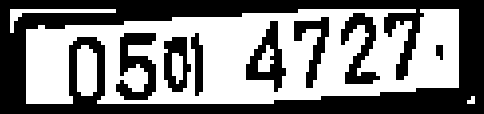

 0050 47274

OCR 결과:
| 0050 47274]



In [61]:
import cv2
import pytesseract
from PIL import Image
from matplotlib import pyplot as plt
import re

# 이미지 불러오기
image_path = r"C:\Parking control system\extracted_plate.jpg"
image = cv2.imread(image_path)

# 그레이스케일 변환
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 디노이즈
gray_image = cv2.fastNlMeansDenoising(gray_image, None, 30, 7, 21)

# 적응형 임계 처리 (adaptive thresholding)
adaptive_thresh = cv2.adaptiveThreshold(
    gray_image,
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY,
    blockSize=11,
    C=2
)

# 밝기 조정
alpha = 1.5  # contrast control
beta = 0  # brightness control
adjusted = cv2.convertScaleAbs(adaptive_thresh, alpha=alpha, beta=beta)

# 결과 이미지 저장
cv2.imwrite('enhanced_plate.jpg', adjusted)

# 이미지 표시
plt.figure(figsize=(6, 4))
plt.imshow(adjusted, cmap='gray')
plt.axis('off')
plt.show()

# OCR 적용
custom_config = r'--oem 3 --psm 6'
text = pytesseract.image_to_string(adjusted, lang='kor', config=custom_config)
clean_text = re.sub(r'[^\w\s]', '', text)
print(clean_text)
print("OCR 결과:")
print(text)


In [65]:

image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 대비 향상 및 블러링
gray_image = cv2.normalize(gray_image, None, 0, 255, cv2.NORM_MINMAX)
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# 이진화 적용
_, thresh_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 컨투어 검출
contours, _ = cv2.findContours(thresh_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 표준 크기 설정
standard_size = (30, 60)  # 표준 문자 크기
extracted_chars = []

# 문자 영역 추출 및 크기 조정
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    
    # 문자 영역이 충분히 크고 적당한 비율인지 확인
    if w > 5 and h > 10 and 0.2 < w/h < 1.0:
        char_img = thresh_image[y:y + h, x:x + w]

        # 크기 조정 및 경계 추가
        resized_char_img = cv2.resize(char_img, standard_size, interpolation=cv2.INTER_AREA)
        bordered_char_img = cv2.copyMakeBorder(resized_char_img, 5, 5, 5, 5, cv2.BORDER_CONSTANT, value=[0, 0, 0])
        
        extracted_chars.append(bordered_char_img)

# 개별 문자 OCR 적용 및 결과 조합
final_text = ''
for char_img in extracted_chars:
    char_text = pytesseract.image_to_string(char_img, config='--oem 3 --psm 10 -c tessedit_char_whitelist=0123456789가나다라마바사아자차카타파하')
    final_text += char_text.strip()

print("OCR 결과:")
print(final_text)

# 결과 이미지 시각화
plt.figure(figsize=(10, 2))
for i, char_img in enumerate(extracted_chars):
    plt.subplot(1, len(extracted_chars), i + 1)
    plt.imshow(char_img, cmap='gray')
    plt.axis('off')
plt.show()


OCR 결과:



<Figure size 1000x200 with 0 Axes>